# . Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [1]:
# pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mulag\AppData\Roaming\nltk_data...
[

True

In [1]:
import pandas as pd
df = pd.read_table('blogs.csv')
df.shape

(2000, 1)

In [2]:
df.head()

,"Data,Labels"
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...


In [3]:
# Specifying the path to our .txt  file
file_path = "D:\\Data Science ExcelR\\Assignments\\Naive Bayes\\blogs.csv"

# open and read the contents of the file
with open(file_path, 'r', encoding = 'utf-8') as file:
    text_data = file.read()

In [4]:
# Tokenization --> Breaks down the words in sentences into Token in a list

from nltk.tokenize import word_tokenize
words = word_tokenize(text_data)
words

['Data',
 ',',
 'Labels',
 "''",
 'Path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'Germany.EU.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'D012S658',
 '!',
 'frank',
 'From',
 ':',
 'frank',
 '@',
 'D012S658.uucp',
 '(',
 'Frank',
 "O'Dwyer",
 ')',
 'Newsgroups',
 ':',
 'alt.atheism',
 'Subject',
 ':',
 'Re',
 ':',
 'islamic',
 'genocide',
 'Date',
 ':',
 '23',
 'Apr',
 '1993',
 '23:51:47',
 'GMT',
 'Organization',
 ':',
 'Siemens-Nixdorf',
 'AG',
 'Lines',
 ':',
 '110',
 'Distribution',
 ':',
 'world',
 'Message-ID',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'References',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [5]:
len(words)

922719

In [6]:
# Converting t0 lower case 

words_lower = [i.lower() for i in words]
words_lower

['data',
 ',',
 'labels',
 "''",
 'path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'germany.eu.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'd012s658',
 '!',
 'frank',
 'from',
 ':',
 'frank',
 '@',
 'd012s658.uucp',
 '(',
 'frank',
 "o'dwyer",
 ')',
 'newsgroups',
 ':',
 'alt.atheism',
 'subject',
 ':',
 're',
 ':',
 'islamic',
 'genocide',
 'date',
 ':',
 '23',
 'apr',
 '1993',
 '23:51:47',
 'gmt',
 'organization',
 ':',
 'siemens-nixdorf',
 'ag',
 'lines',
 ':',
 '110',
 'distribution',
 ':',
 'world',
 'message-id',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'references',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [7]:
len(words_lower)

922719

In [8]:
# Stop Words --> the words which do not give any meaning in the sentence

from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# Removing StopWords

stopwords_remove = []
for word in words_lower:
    if word not in stopwords_list:
        stopwords_remove.append(word)
stopwords_remove
print('After removing StopWords:', len(stopwords_remove))

After removing StopWords: 678149


In [10]:
# Removing Punctuations

import string
string.punctuation
punctuations = '''!()-[]{}:;'"\,<>./?@#$%^&*_~.....''``'s'''
words_without_punctuations = []
for word in stopwords_remove:
    if word not in punctuations:
        words_without_punctuations.append(word)
print('After removing the Punctuations:', len(words_without_punctuations))

After removing the Punctuations: 437458


In [11]:
# Stemming and Lemmatization

from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [12]:
stemmed_words = [porter_stemmer.stem(word) for word in words_without_punctuations]
print(len(stemmed_words))

437458


In [23]:
# pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/299.9 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/299.9 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/299.9 kB 326.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 290.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 290.5 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 419.0 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 445.2 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 445.2 kB/s eta 0:00:01
 

In [13]:
from wordcloud import WordCloud

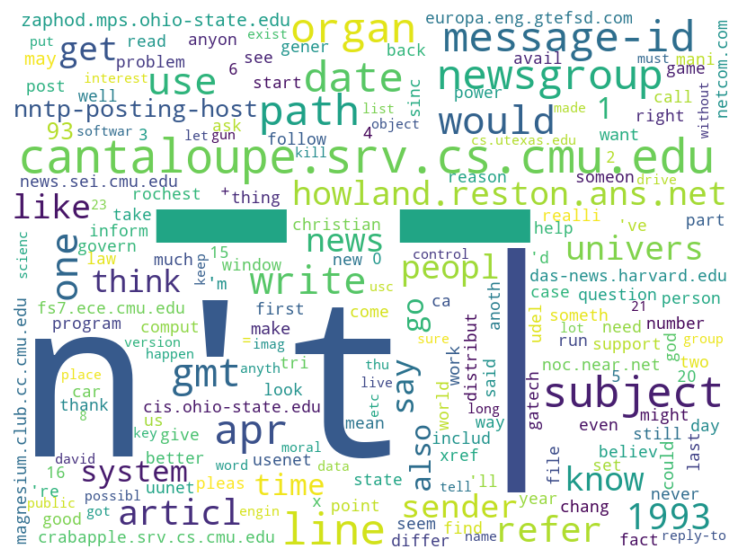

In [14]:
import matplotlib.pyplot as plt

word_counts = {}
for word in stemmed_words:
    if word not in word_counts:
        word_counts[word] = 0
    word_counts[word] += 1
wordcloud = WordCloud(width = 800, height = 600, background_color = 'white').generate_from_frequencies(word_counts)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words1 = [word for word in stemmed_words if word not in ["n't", "would", "cantaloupe.srv.cs.cmu.edu", "gmt",'date','gmt','line','one','apr','hoeland.reston.ans.net']]
len(words1)

420441

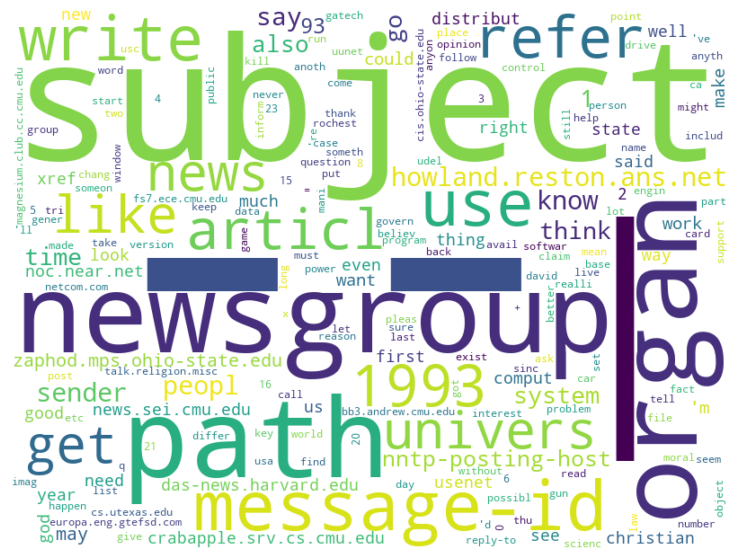

In [16]:
# Creating a dictionary to store the word frequency
word_counts = {}

for word in words1:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1


# Creating the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

# Displaying the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
doc = ''.join(words1)
doc

"datalabelpathmagnesium.club.cc.cmu.edunews.sei.cmu.educis.ohio-state.eduzaphod.mps.ohio-state.eduhowland.reston.ans.netagatdoc.ic.ac.ukuknetmcsungermany.eu.netthoth.mchp.sni.dhorus.ap.mchp.sni.dd012s658frankfrankd012s658.uucpfranko'dwyernewsgroupalt.athsubjectislamgenocid23199323:51:47organsiemens-nixdorfag110distributworldmessage-id1r9vej5k5horus.ap.mchp.sni.drefer1r4o8a6qefido.asd.sgi.com1r5ublbd6horus.ap.mchp.sni.d1r76ek7uofido.asd.sgi.comnntp-posting-hostd012s658.ap.mchp.sni.darticl1r76ek7uofido.asd.sgi.comliveseysolntze.wpd.sgi.comjonliveseywritearticl1r5ublbd6horus.ap.mchp.sni.dfrankd012s658.uucpfranko'dwyerwrite|articl1r4o8a6qefido.asd.sgi.comliveseysolntze.wpd.sgi.comjonliveseywrite||noteparticularsocieticasemainlanduk|religmotivmurdermurder|kindsaylittlwhetherinter-religionmurderelsewher|religimotiv||allowconcludnothinher|religionmattercatholicprotestant|motivkillmotivallowchristianbiblsaymaykillcertaincircumstfactinstructkillcertaincircumst'dsaymajorpeoplmoralsysteminstructk

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Creating a CountVectorizer object with ngram_range = (2,2) to extract bigrams
vect = CountVectorizer(ngram_range = (2,2))

In [20]:
# Fitting the vectorizer to the document

counts = vect.fit_transform([doc])
vocab = vect.get_feature_names_out()

In [21]:
# Getting the top 20 bigram counts

top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]
top_20_bigrams

array([25894, 35861, 41076, 25912, 36488, 36627, 25918, 45442, 38227,
       33737, 41531, 25960, 58451, 38084, 65933, 67368, 30865, 56243,
       64373, 59512], dtype=int64)

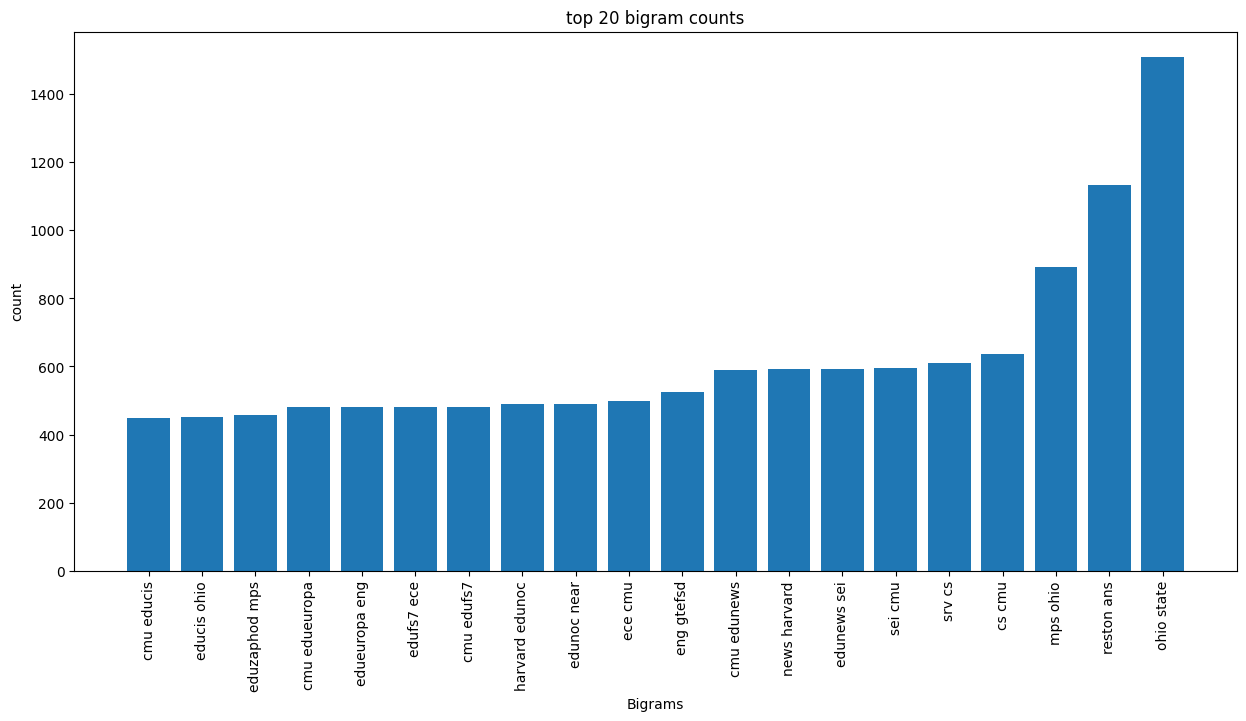

In [22]:
# Constructing ba chart of the top 20 bigram counts

plt.figure(figsize=(15,7))
plt.bar(vocab[top_20_bigrams],counts.toarray()[0,top_20_bigrams])
plt.xticks(rotation=90)
plt.xlabel("Bigrams")
plt.ylabel("count")
plt.title("top 20 bigram counts")
plt.show()

# . Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

•	Examine the distribution of sentiments across different categories and summarize your findings.


In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Applying sentiment analysis and classifying as positive or negative based on the Sentiment Score
df['Sentiment_Score'] = df['Data,Labels'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,"Data,Labels",Sentiment_Score
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0.8856
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821


In [24]:
# Creating a new column for positive or negative labels
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')
df.head()

,"Data,Labels",Sentiment_Score,Sentiment_Label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0.8856,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821,Positive


In [25]:
# Now converting the text data into Lower cases
df['Data,Labels'] = df['Data,Labels'].str.lower()
df.head()

,"Data,Labels",Sentiment_Score,Sentiment_Label
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966,Negative
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,0.8856,Positive
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969,Negative
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999,Negative
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821,Positive


In [26]:
# Removing the punctuations for the text

import string
df['Data,Labels'] = df['Data,Labels'].str.replace('[{}]'.format(string.punctuation),'')
df.head()

C:\Users\mulag\AppData\Local\Temp\ipykernel_14340\1877757650.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Data,Labels'] = df['Data,Labels'].str.replace('[{}]'.format(string.punctuation),'')


,"Data,Labels",Sentiment_Score,Sentiment_Label
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9966,Negative
1,newsgroups altatheism\npath cantaloupesrvcscmu...,0.8856,Positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-0.9969,Negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9999,Negative
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.9821,Positive


In [27]:
# Performing the Lemmatizer

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Data,Labels'] = df['Data,Labels'].apply(lambda x: ''.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,"Data,Labels",Sentiment_Score,Sentiment_Label
0,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...,-0.9966,Negative
1,newsgroupsaltatheismpathcantaloupesrvcscmueduc...,0.8856,Positive
2,pathcantaloupesrvcscmuedudasnewsharvardedunocn...,-0.9969,Negative
3,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...,-0.9999,Negative
4,xrefcantaloupesrvcscmuedualtatheism53485talkre...,0.9821,Positive


In [28]:
# Removing the Stop Words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['Data,Labels'] = df['Data,Labels'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mulag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,"Data,Labels",Sentiment_Score,Sentiment_Label
0,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...,-0.9966,Negative
1,newsgroupsaltatheismpathcantaloupesrvcscmueduc...,0.8856,Positive
2,pathcantaloupesrvcscmuedudasnewsharvardedunocn...,-0.9969,Negative
3,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...,-0.9999,Negative
4,xrefcantaloupesrvcscmuedualtatheism53485talkre...,0.9821,Positive


In [29]:
df.shape

(2000, 3)

# Naive Bayes Model for Text Classification
•	Split the data into training and test sets.

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

•	Train the model on the training set and make predictions on the test set.


In [30]:
x = df['Data,Labels']
Y = df['Sentiment_Label']

In [31]:
# Calculating TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [32]:
X = vectorizer.fit_transform(x)
x_new = X.toarray()
x_new = pd.DataFrame(x_new)
x_new.to_csv("newdata.csv")
x_new.head()

,0,1,2,3,4,5,6,7,8,9,...,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Data Partition

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new,Y,test_size = 0.20)

In [34]:
# Fitting the Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

# Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

•	Discuss the performance of the model and any challenges encountered during the classification process.

•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [36]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train, y_pred_train)
print('Training Accuracy:', ac1)
ac2 = accuracy_score(y_test, y_pred_test)
print('Test Accuracy:', ac2)

Training Accuracy: 0.99875
Test Accuracy: 0.6675


In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train, average = 'weighted')
Recall = recall_score(y_train, y_pred_train, average = 'weighted')
F1 = f1_score(y_train, y_pred_train, average = 'weighted')

In [38]:
print('Accuracy:', accuracy)
print('Precision:', Precision)
print('Recall:', Recall)
print('F1:', F1)

Accuracy: 0.99875
Precision: 0.99875234082397
Recall: 0.99875
F1: 0.9987494131465717


In [39]:
print('Classification Report:', classification_report(y_train, y_pred_train))

Classification Report:               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       534
    Positive       1.00      1.00      1.00      1066

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



Sentiment analysis revealed that the blogs exhibit varying emotional tones across the dataset. The Data column was successfully analyzed using VADER, and each blog post was categorized as Positive, Negative, or Neutral based on the compound sentiment score.

- Interpretation:

1. Positive blogs are often more engaging and uplifting, suggesting that these could align with categories like lifestyle, self-improvement, or success stories.
2. Negative blogs typically reflect critiques, challenges, or problem-oriented discussions, relevant for political, economic, or issue-based categories.
3. Neutral blogs focus on facts and balanced perspectives, which are likely found in educational or news-related categories.